# Code 4
- Numerical EDA
  - Basic Transforrmation
- Logistic Model (Balanced/ Unbalanced)

## 1/ Import Libraries

In [1]:
#CodeSection1
# from google.colab import drive
# drive.mount('/mntDrive') 

In [2]:
#CodeSection2
import pandas as pd
import numpy as np

## 2/ Import Data

In [3]:
#CodeSection3
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

## 3/ Combine both Datasets (train, test)

In [4]:
#CodeSection4
all_data = [train, test]

### Check Combined Data 
- Missing Value
- Data Types

In [5]:
#CodeSection5
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
dtype: int64

In [6]:
#CodeSection6
# Check Data types for each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [39]:
#numerical_features = ['city_development_index', 'training_hours']
#categorical_features = ['city','gender', 'relevent_experience', 'enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

In [9]:
train.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,18359.000000,18359,18359.000000,14261,18359,18017,17902,15521,18300,13580,13320,17992,18359.000000,18359.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4358,NaN,12884,13596,13659,10769,13738,3437,3120,10051,7567,NaN,NaN
mean,16729.360096,NaN,0.847140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.899014,0.132088
std,9643.749725,NaN,0.110189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.885300,0.338595
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8378.500000,NaN,0.796000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16706.000000,NaN,0.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25148.500000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.000000,0.000000


## 4/ EDA - Check Numerical Variables

In [10]:
#CodeSection7
# Lets Import the Seaborn Library
import seaborn as sns

### Lets start with Numerical Variable/Feature - 1

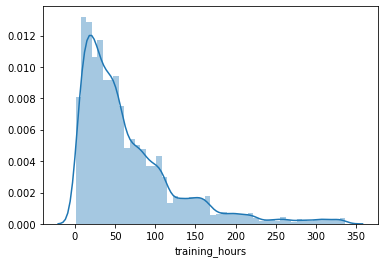

In [11]:
#CodeSection8
# in this case we start with "training_hours"
# Use distplot to check if its a normal distribution
sns.distplot(train['training_hours'])
# Not Normal

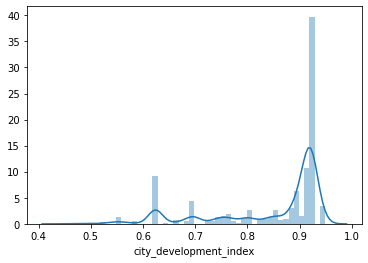

In [14]:
sns.distplot(train['city_development_index'])

### Log Transformation
- Transform a Numerical Feature to Normal

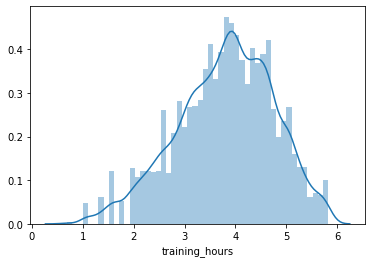

In [13]:
#CodeSection9
# Use np.log to tranform make your feature normal
feature_normal = np.log(train['training_hours']+1)

# Plot Normal Distribution
sns.distplot(feature_normal)

### Now lets Tranform One Variable/Feature

In [16]:
#CodeSection10
# Write the Transformation Code
for datasets in all_data:
    datasets['training_hours']=np.log(datasets['training_hours']+1)
 # "1" is added to avoid error for rows that contain "0"

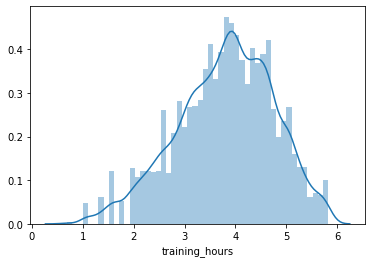

In [17]:
#CodeSection11
# Lets check again
sns.distplot(train['training_hours'])
# Normal Distribution

### Replicate for other Numerical Variable/Features

In [18]:
#CodeSection12

# Identify all other Numerical Variables 
numerical_features1 = ['city_development_index']
for datasets in all_data:
    datasets['city_development_index']=np.log(datasets['city_development_index']+1)


## 5/ Impute Numerical Variables

### Impute all Numerical Variables at once



In [20]:
#CodeSection13
numerical_features = ['city_development_index', 'training_hours']
for num_var in numerical_features:
    for datasets in all_data:
        datasets[num_var] = datasets[num_var].fillna(datasets[num_var].median())
        

## 6/ Impute Categorical Variables
- Lets try another Strategy of Imputing "Missing" where a Category value is missing

### Impute all Categorical Variables at once

In [21]:
#CodeSection14
categorical_features = ['city','gender', 'relevent_experience', 'enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
for cat_var in categorical_features:
    for datasets in all_data:
        datasets[cat_var] = datasets[cat_var].fillna(datasets[cat_var].mode()[0])

## 7/ Now Re Check all Features

In [22]:
#CodeSection15
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                        0
relevent_experience           0
enrolled_university           0
education_level               0
major_discipline              0
experience                    0
company_size                  0
company_type                  0
last_new_job                  0
training_hours                0
target                    15021
dtype: int64

## 8/ Prepare Data for Model Model

In [23]:
#CodeSection16
# Check First 5 Rows of Test Data
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.370183,Male,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,1,2.772589
1,12036,city_28,0.662172,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,4.553877
2,11061,city_103,0.652325,Male,No relevent experience,Full time course,Graduate,STEM,3,50-99,Pvt Ltd,1,2.890372
3,5032,city_104,0.654406,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,4.343805
4,17599,city_77,0.604316,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,4.189655


In [24]:
#CodeSection17
# Get X and y Variables for your Dataset
X=train.drop(['enrollee_id','target'], axis=1)
y= train['target']

### Create Dummy Variables for  Categorical Variables

In [25]:
#CodeSection18
# Get Dummy Variables
X = pd.get_dummies(X, drop_first= True)  # Keep only n - 1 Variables - Use "drop_first = True"

## 9/ Build Model

In [26]:
#CodeSection19
#Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression

#Initialize LR
clf = LogisticRegression(max_iter = 1000, class_weight='balanced')

In [27]:
#CodeSection20
# Fit Model
model = clf.fit(X, y)

### Check Accuracy of Model on Train Data

In [28]:
#CodeSection21
# Predict on Train Data
y_pred = model.predict(X)

### We can use a Accuracy Function from Metrics
- Check Train Accuracy

In [29]:
#CodeSection22
# Import metrics library
from sklearn.metrics import roc_auc_score

In [30]:
#CodeSection23
# get Actual "y" variables (use "y_true" as variable)
y_true = train['target']

In [31]:
#CodeSection24
# Print Train Accuracy
print(f" Train Accuracy : {roc_auc_score(y_true, y_pred):0.1%}")

 Train Accuracy : 63.2%


## 10/ Predict and Submit

### Predict

In [32]:
#CodeSection25
# Get all the X Variables from the Test Dataset
X_test = test.drop(['enrollee_id'], axis =  1)

In [33]:
#CodeSection26
#Covert to Dummies
X_test = pd.get_dummies(X_test, drop_first=True)

In [34]:
#CodeSection28
# Predict on X_test Data ("X_test_prep")
X_test_prep = model.predict(X_test)

### Import Sample Submission

In [35]:
#CodeSection29
sample_submission = pd.read_csv('input/sample_submission.csv')
sample_submission.head()

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,0
3,5032,0
4,17599,0


### Create Submission File

In [36]:
#CodeSection30
submission = pd.DataFrame({
    'enrollee_id' : test['enrollee_id'],
    'target' : X_test_prep
})

### Export Submission File

In [37]:
#CodeSection31
submission.to_csv('output/O4_Transformation_Strategy.csv', index = False)

In [38]:
# LB Accuracy : 0.6212704437436625